<a href="https://colab.research.google.com/github/JoaoVitorMarques14/JoaoMarques/blob/master/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Analizing San Francisco rental market through Airbnb data

[Airbnb](https://www.airbnb.com.br/) is considered **one of the largest hotel companies in the world** and **not owning a single hotel.** 

This website connects hosts that are willing to rent an apartment or room to travelers. This way, Airbnb offers an interesting alternative for accommodation in Big cities.

By the end of 2018, this startup company that was founded only 10 years before, had already **hosted more than 300 million people** around the world and really challenging the traditional hotel chains.

An Airbnb great initiative is to make the data available for some of the world's biggest cities. It is possible obtain real data from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) to develop data science projects and solutions. 

The purpose of this report is to ....

<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



## Obtaining data

All the data used in this report was taken from [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For this analysis it was used the following archive:
* `listings.csv` - *Summary information and metrics for listings in San Francisco (good for visualisations).*

In [36]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#Importing the archive listings.csv to a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2020-06-08/visualisations/listings.csv")


## Data Analysis


**Dicionário das variáveis**

* `id` - Property id
* `name` - Property name
* `host_id` - Property owner's id
* `host_name` - Host name
* `neighbourhood_group` - This column has no value
* `neighbourhood` - Neighbourhood name
* `latitude` - Property latitude coordinate
* `longitude` - Property longitude coordinate
* `room_type` - Type of offered room
* `price` - Rental price
* `minimum_nights` - Minimum nights a guest can book
* `number_of_reviews` - Number of reviews the property has
* `last_review` - date of the last review
* `reviews_per_month` - Number of reviews per month
* `calculated_host_listings_count` - Number of property the host has
* `availability_365` - Number of available days in 365 days


 

Before starting the analyses let's check the first 5 lines of our dataset.

In [3]:
# Displaying the first 5 inputs
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,241,2020-03-28,1.82,1,143
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.82,1,0
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,19,2020-03-06,0.14,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,8,2018-09-12,0.11,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,726,5,28,2019-06-28,0.21,2,365


### **Knowing the size of our dataset.**
How many variables and inputs does my dataset have? What kinds of variables are in the dataset? 

In [4]:
# Identifying the dataset size
print("Inputs:\t {}".format(df.shape[0]))
print("Variables:\t {}".format(df.shape[1]))
print('\n')
# Visualizing the types of variables in the dataset
print(df.dtypes)


Inputs:	 7814
Variables:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **How complete is the dataset?**
The next step is to see how many null values the dataset presents. The dataset quality is directly related to the number of null values. It's important to understand how significant the null values are in comparison to the total number of inputs. 
* It is possible to see that the whole `neighbourhood_group` column presents a 100% of its values null.
* The variables `reviews_per_month` and `last_review` present around 23% of null values.  

In [5]:
# Ordering variables with null values in an ascending way
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.234451
last_review                       0.234451
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Analyzing the variables distribution** 
Histograms are a great way to display the distribution of a variable. Let's see how the variables in this analysis behave.

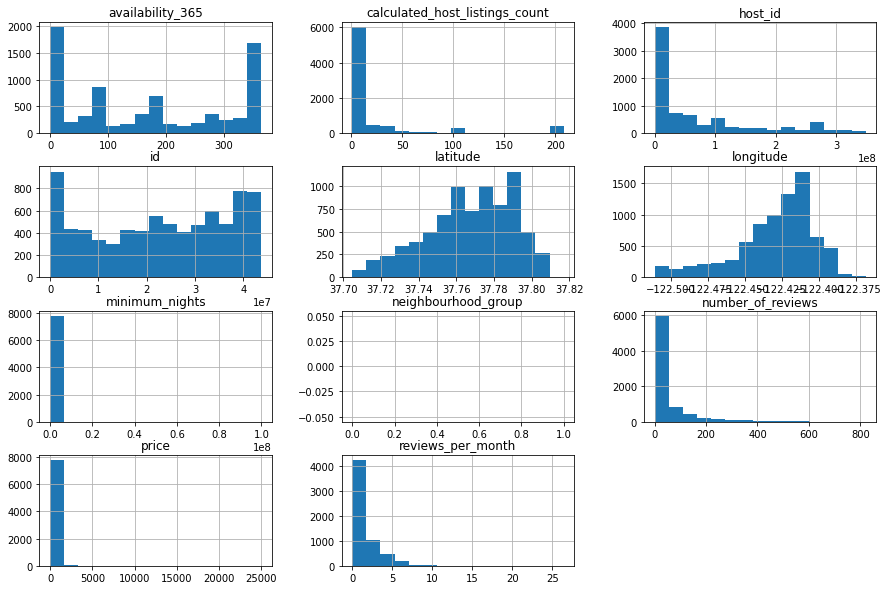

In [6]:
# Plotting the histogram of the variables

df.hist(bins=15, figsize=(15,10));

### **Are there outliers?**
Based on the histogram analysis above, it is possible to state that there are certainly outliers. These values distort the distribution and do not represent the values intended to be analyzed in this report. 
There are two ways to prove the existence of outliers: 

* Statistical summary through the `describe()` method.
* Plotting the `boxplots` for the variable.

In [7]:
# Checking the statistical summary of the variables

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7814.000000,7.814000e+03,7814.000000,5982.000000,7814.000000,7814.000000
mean,234.282186,1.281551e+04,44.284233,1.437300,21.634502,169.643205
std,622.259833,1.131262e+06,81.380247,1.766009,47.908904,138.870365
min,0.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000e+00,1.000000,0.230000,1.000000,23.000000
50%,148.000000,7.000000e+00,8.000000,0.710000,2.000000,159.500000
75%,229.000000,3.000000e+01,50.000000,2.050000,12.000000,321.750000
max,25000.000000,1.000000e+08,821.000000,26.390000,208.000000,365.000000


Here are some conclusions from this brief analysis:
* 75% of the variable `price`is below 229, its maximum value is 25000 though.
* The maximum value of `minimum_nights`is above 365 days in a year.

#### Boxplot for minimum_nights


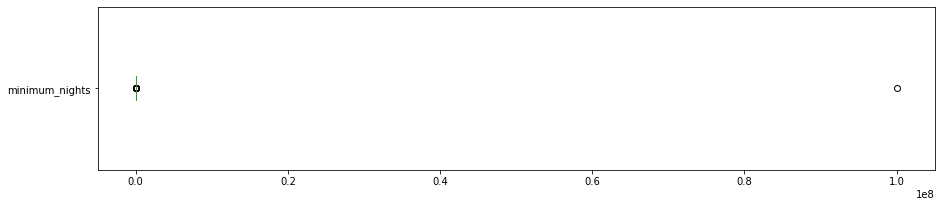

minimum_nights: number of values above 30 days:
332 inputs
4.249%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert = False, figsize=(15,3))
plt.show()

# Checking the number of values above 30 days for minimum_nights

print("minimum_nights: number of values above 30 days:")
print("{} inputs".format(len(df[df.minimum_nights>30])))
print("{:.3f}%".format((len(df[df.minimum_nights>30])/df.shape[0])*100))

This simple analysis shows us that there is a single value ruining our analysis. It needs removing.






#### Boxplot for price
Let's do the same procedure for the variable `price`.

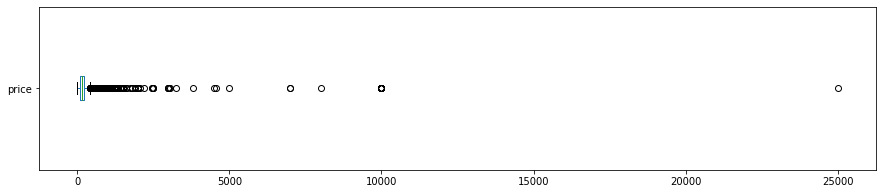

price: number of values above 1000:
108 inputs
1.382%


In [9]:
# price
df.price.plot(kind = "box", vert = False, figsize = (15,3))
plt.show()

print("price: number of values above 1000:")
print("{} inputs".format(len(df[df.price>1000]) ))
print("{:.3f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

#### Histogram without outliers
The following procedure is going to remove the outliers from our analysis and then plotting updated histograms. 

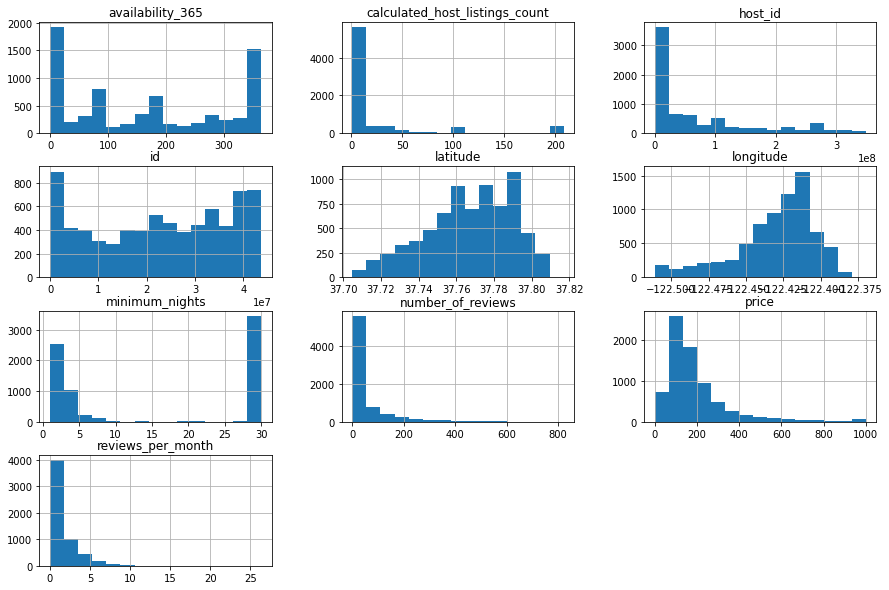

In [10]:
# removing the outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index,  inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, inplace = True)

# removing the group 'neighbourhood_group' once it has no values

df_clean.drop("neighbourhood_group", axis = 1, inplace = True)

#plotting the histograms

df_clean.hist(bins=15, figsize = (15,10));

### **Variables correlation**
**Correlation** or **dependence** is a statistical relationship between two variables. Our objective here is to find it in our dataset.

This relationship can be measured, and the purpose of the correlation coefficient is to establish how strong is this relationship. There are only two procedures to identify the existent correlations in these variables:
* Generate a correlation matrix.
* Create a heatmap from this matrix by using `seaborn`library.

In [11]:
# Creating a correlation matrix
correlation = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365' ]].corr()

# Displaying the correlation matrix
display(correlation)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.201221,-0.104831,-0.125979,-0.079144,-0.082081
minimum_nights,-0.201221,1.000000,-0.338966,-0.396208,0.296127,0.328184
number_of_reviews,-0.104831,-0.338966,1.000000,0.751819,-0.205101,0.012750
reviews_per_month,-0.125979,-0.396208,0.751819,1.000000,-0.186060,-0.018847
calculated_host_listings_count,-0.079144,0.296127,-0.205101,-0.186060,1.000000,0.029482
availability_365,-0.082081,0.328184,0.012750,-0.018847,0.029482,1.000000


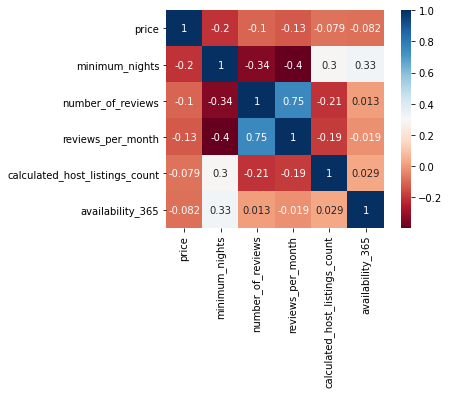

In [12]:
# Creating a heatmap from the correlation matrix
sns.heatmap(correlation, cmap="RdBu", square=True, annot=True);


### **What is the best rental property?**
If you have already used Airbnb services you probably know that different types of rooms are available. From entire houses to shared appartment. To know what is the most rental type of property we are going to use the method `value_count()` on the variable `romm_type` and count the number of rents for each kind of room. 

In [18]:
# Displaying the number of rooms available for each type.
df_clean.room_type.value_counts()


Entire home/apt    4357
Private room       2693
Shared room         234
Hotel room           95
Name: room_type, dtype: int64

In [19]:
# Displaying the percentage of rooms availables for each type
df_clean.room_type.value_counts()/df_clean.shape[0]


Entire home/apt    0.590459
Private room       0.364955
Shared room        0.031712
Hotel room         0.012874
Name: room_type, dtype: float64

Based on this analysis it is possible to state that most of the rooms available (around 60%) are entire home/apartment while hotel rooms present only 1.2% of the total rooms available.  

### **What is the most expensive region to live in San Francisco?**
It is possible to compare a variables by using the operation `groupby()`. In this case, the idea is to compare the neighbourhoods based on rental prices.



In [29]:
# Displaying the average rental price for different neighbourhoods
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pacific Heights        264.107595
Glen Park              254.696429
Marina                 251.355263
Russian Hill           247.989362
Twin Peaks             246.523077
Presidio Heights       239.304348
Diamond Heights        233.000000
Castro/Upper Market    229.258145
Noe Valley             220.031469
Potrero Hill           216.456221
Name: price, dtype: float64

Because the dataset presents latitudes and longitudes of the properties, it is possible to plot each coordinate.  

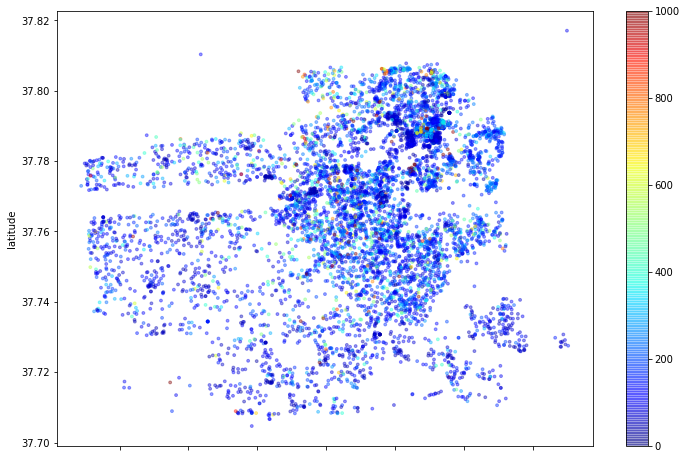

In [34]:
# Plotting the properties coordinates
df_clean.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4, c=df_clean["price"], s=8, cmap=plt.get_cmap("jet"), figsize=(12,8));


## Conclusions
Based on this superficial analysis of a dataset from Airbnb it was possible to see how outliers interfere in the analysis. Yet the top 10 most expensive regions to live in San Francisco do not present a great difference in price (around only 50 dollars between the most and the tenth most expensive region).

At last, the dataset used in this analysis is not the complete version, and therefore it is useful for a superficial analysis only. For a better understanding and a more thorough study, it is recommended to use a more complete dataset, featuring 106 attributes.  
